1. Phân tích dataset gốc

In [1]:
#0.Thêm thư viện
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

import plotly.graph_objects as go


In [2]:
df = pd.read_csv("D:/UIT_Documentation/DataMining/FinalRP/Source/Data-Mining-Crime-Data-At-Los-Angeles-From-2020/Crime_Data_from_2020_to_Present.zip",low_memory=False)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752906,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,15,N Hollywood,1548,2,662,"BUNCO, GRAND THEFT",...,IC,Invest Cont,662.0,NaN,NaN,NaN,5300 DENNY AV,NaN,34.1667,-118.3643
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           752911 non-null  int64  
 1   Date Rptd       752911 non-null  object 
 2   DATE OCC        752911 non-null  object 
 3   TIME OCC        752911 non-null  int64  
 4   AREA            752911 non-null  int64  
 5   AREA NAME       752911 non-null  object 
 6   Rpt Dist No     752911 non-null  int64  
 7   Part 1-2        752911 non-null  int64  
 8   Crm Cd          752911 non-null  int64  
 9   Crm Cd Desc     752911 non-null  object 
 10  Mocodes         649650 non-null  object 
 11  Vict Age        752911 non-null  int64  
 12  Vict Sex        654681 non-null  object 
 13  Vict Descent    654675 non-null  object 
 14  Premis Cd       752902 non-null  float64
 15  Premis Desc     752476 non-null  object 
 16  Weapon Used Cd  261472 non-null  float64
 17  Weapon Des

In [4]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.529110e+05,752911.000000,752911.000000,752911.000000,752911.000000,752911.000000,752911.000000,752902.000000,261472.000000,752901.000000,55707.000000,1867.000000,56.000000,752911.000000,752911.000000
mean,2.147860e+08,1334.819522,10.717709,1118.176904,1.415733,500.887534,29.917438,305.961031,362.587183,500.628462,957.243758,983.637922,990.232143,33.970994,-117.997822
std,1.028819e+07,653.789438,6.092023,609.213814,0.492848,207.980041,21.730057,216.813311,123.718159,207.770351,111.905237,51.420326,28.834317,1.869766,6.483999
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.021116e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429500
50%,2.119101e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321400
75%,2.215044e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


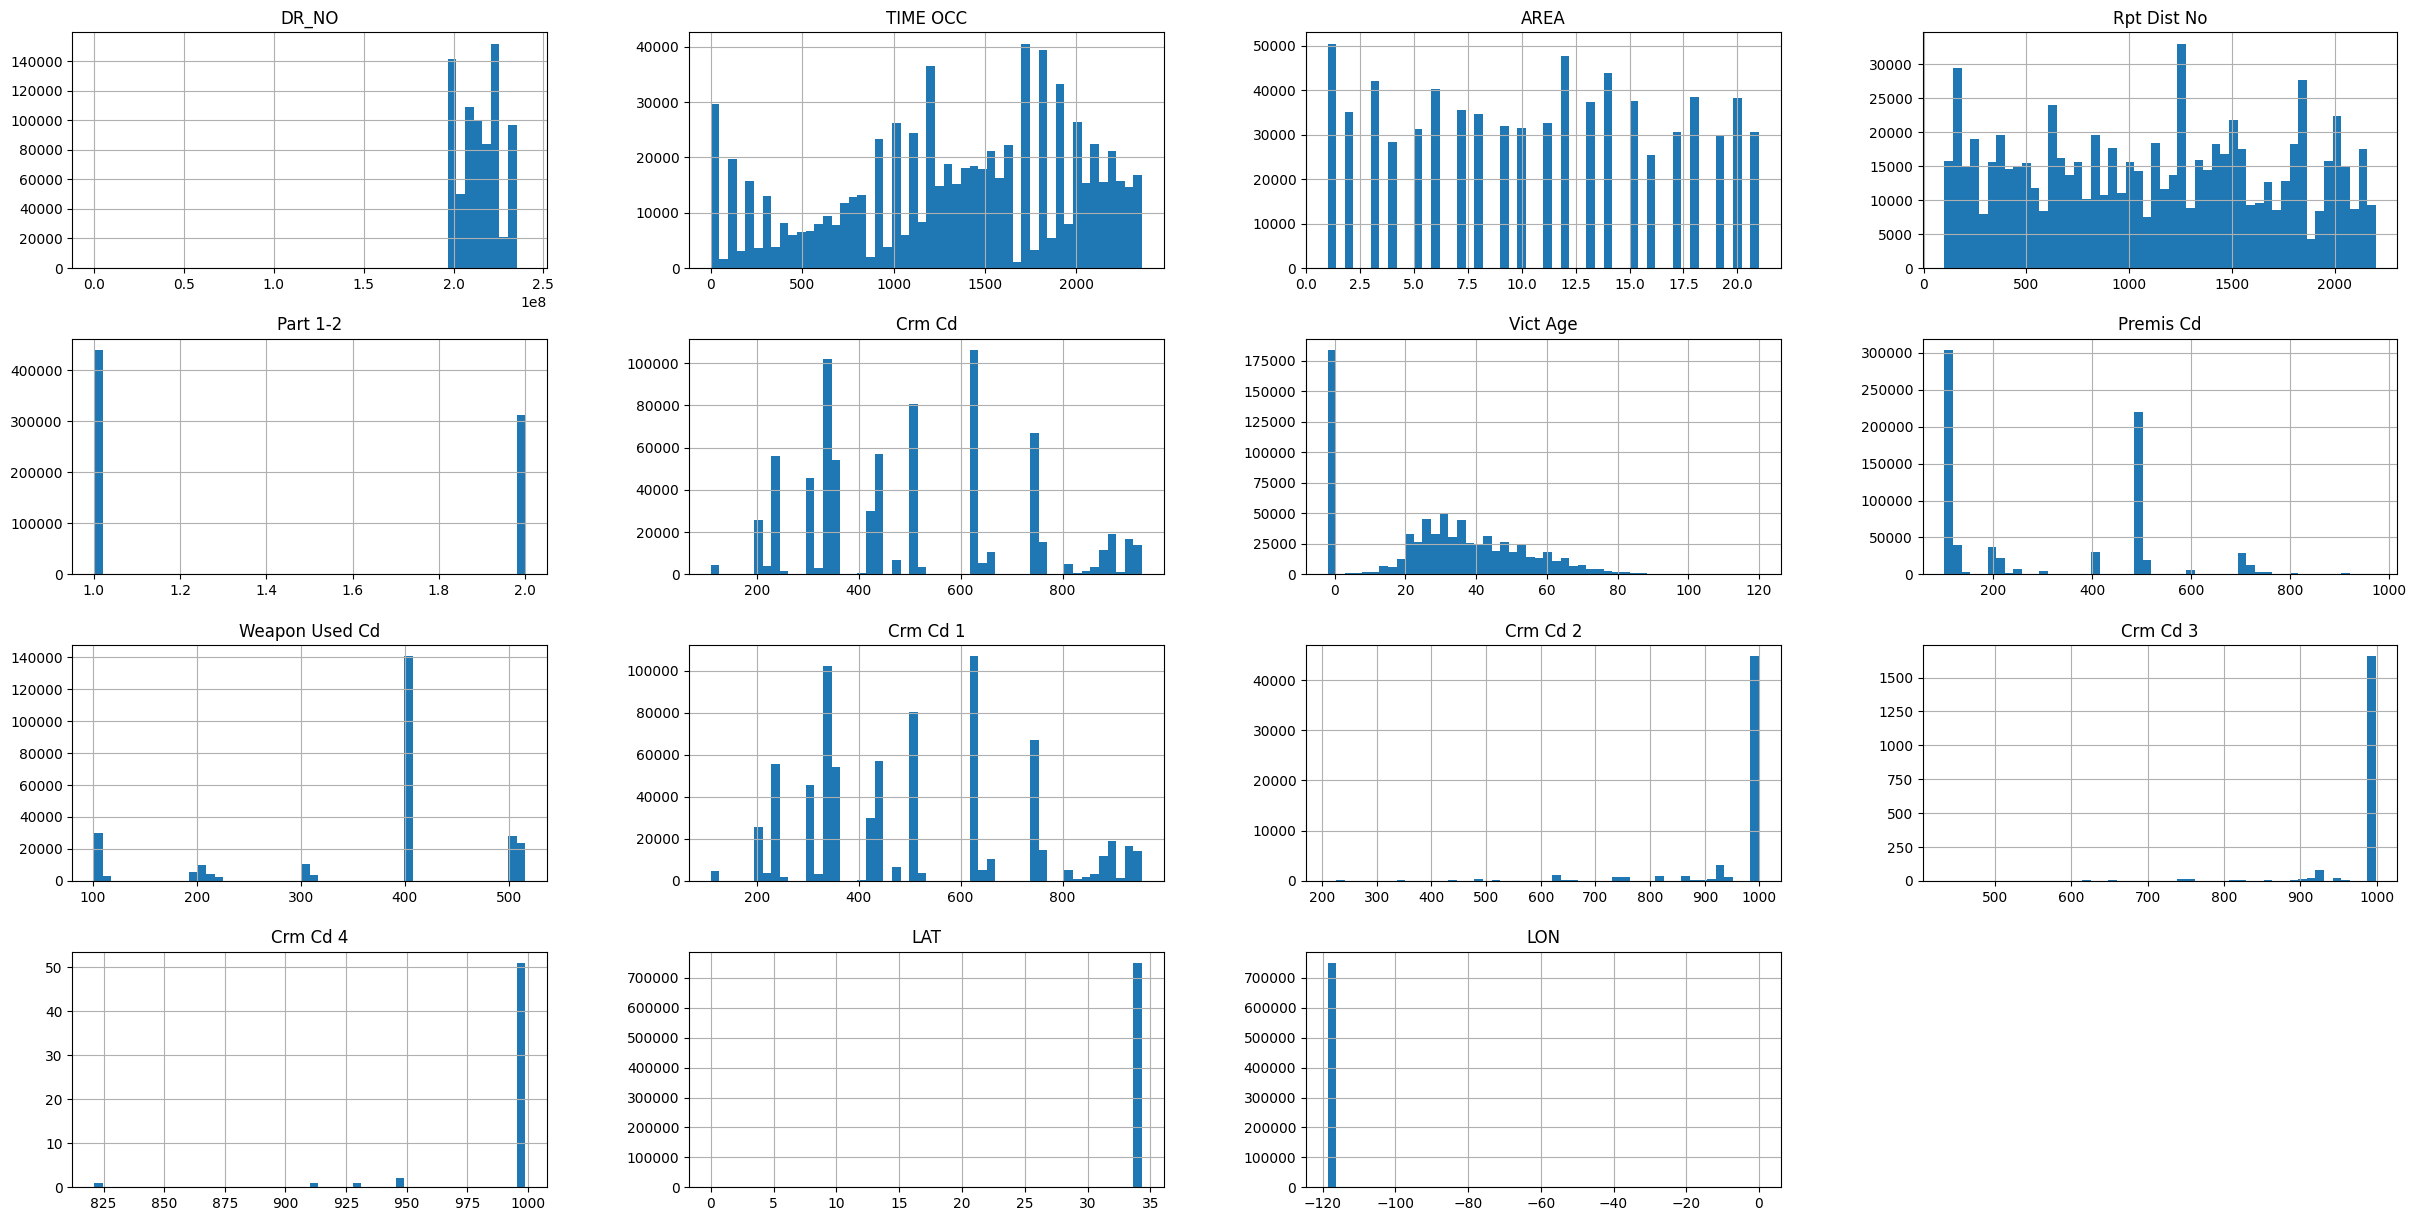

In [5]:
df.hist(bins=50,figsize=(30, 15))
plt.show()

### **Xác định các giá trị còn thiếu**

Tỷ lệ phần trăm giá trị bị thiếu:  19.52 %
                số lượng  Phần trăm
Crm Cd 4            752855   99.992562
Crm Cd 3            751044   99.752029
Crm Cd 2            697204   92.601118
Cross Street        631859   83.922137
Weapon Used Cd      491439   65.271858
Weapon Desc         491439   65.271858
Mocodes             103261   13.714901
Vict Descent         98236   13.047492
Vict Sex             98230   13.046695
Premis Desc            435    0.057776
Crm Cd 1                10    0.001328
Premis Cd                9    0.001195


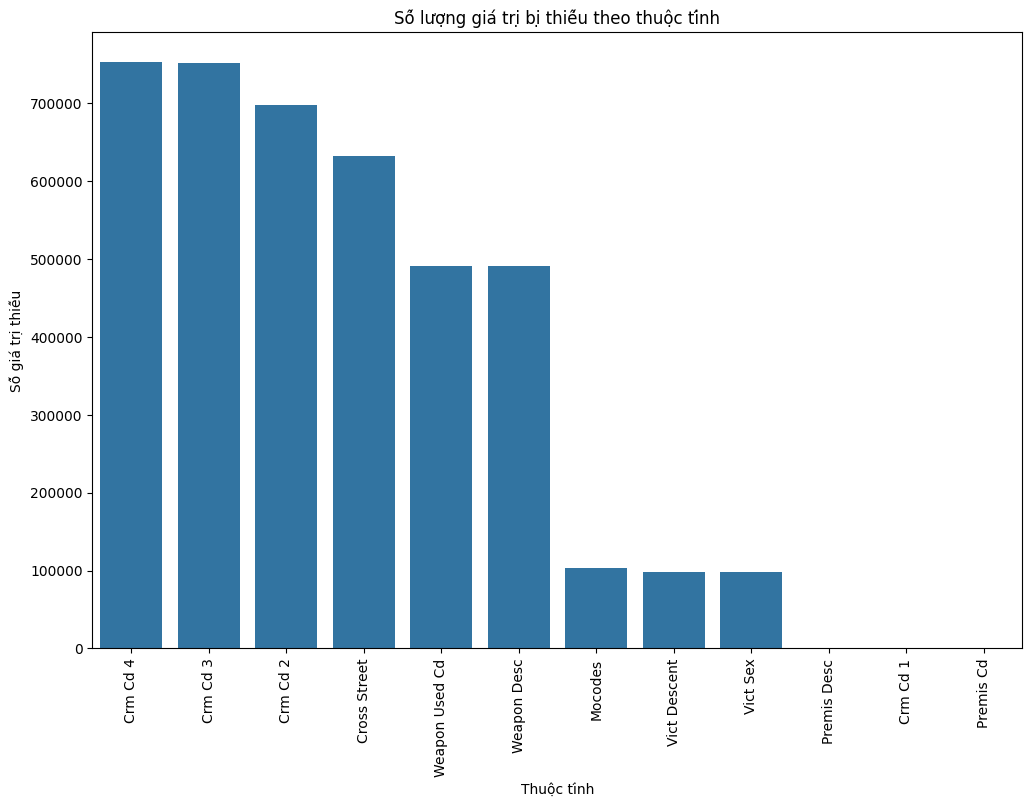

In [6]:
def feature_missing_values(df):
    # Tính tổng số giá trị bị thiếu
    total_missing = df.isnull().sum().sum()
    # Tính tổng số ô trong DataFrame
    total_cells = df.shape[0] * df.shape[1]
    # Tính tỷ lệ phần trăm các giá trị bị thiếu
    percent_missing = (total_missing / total_cells) * 100
    print('Tỷ lệ phần trăm giá trị bị thiếu: ', round(percent_missing, 2), '%')

    # Tạo DataFrame để lưu trữ thông tin về các giá trị bị thiếu
    missing_info = pd.DataFrame(df.isnull().sum(), columns=['số lượng'])
    missing_info['Phần trăm'] = (missing_info['số lượng'] / df.shape[0]) * 100
    missing_info = missing_info[missing_info['số lượng'] > 0]
    missing_info = missing_info.sort_values(by='số lượng', ascending=False)

    print(missing_info)

    # Trực quan hóa các giá trị bị thiếu
    plt.figure(figsize=(12, 8))
    sns.barplot(x=missing_info.index, y=missing_info['số lượng'])
    plt.xticks(rotation=90)
    plt.title('Số lượng giá trị bị thiếu theo thuộc tính')
    plt.xlabel('Thuộc tính')
    plt.ylabel('Số giá trị thiếu')
    plt.show()

# Gọi hàm feature_missing_values với DataFrame df
feature_missing_values(df)



In [7]:
# # Xóa các dòng bị thiếu dữ liệu
# df_cleaned = df.dropna()

# # Kiểm tra lại tỷ lệ phần trăm các giá trị bị thiếu sau khi xóa các dòng bị thiếu
# feature_missing_values(df_cleaned)

# # Kiểm tra xem có còn dòng nào bị thiếu dữ liệu hay không
# missing_after_cleaning = df_cleaned.isnull().sum().sum()
# if missing_after_cleaning == 0:
#     print("Không còn dòng nào bị thiếu dữ liệu.")
# else:
#     print(f"Vẫn còn {missing_after_cleaning} giá trị bị thiếu trong DataFrame.")

### **Xác định các cột chỉ có 1 giá trị duy nhất**

In [8]:
def kiem_tra_gia_tri_duy_nhat(df):
    cot_gia_tri_duy_nhat = []
    thong_tin_chi_tiet = []

    for cot in df.columns:
        gia_tri_duy_nhat = df[cot].value_counts()
        so_luong_gia_tri_duy_nhat = len(gia_tri_duy_nhat)
        
        if so_luong_gia_tri_duy_nhat == 1:
            gia_tri = gia_tri_duy_nhat.index[0]
            so_luong = gia_tri_duy_nhat.iloc[0]
            tong_so_hang = df.shape[0]
            ti_le_phan_tram = (so_luong / tong_so_hang) * 100
            
            print(f"Cột '{cot}' chỉ có 1 giá trị duy nhất: {gia_tri}")
            print(f"Số lượng giá trị duy nhất: {so_luong}")
            print(f"Tổng số hàng: {tong_so_hang}")
            print(f"Phần trăm: {ti_le_phan_tram:.2f}%")
            print("-" * 50)
            
            cot_gia_tri_duy_nhat.append(cot)
            thong_tin_chi_tiet.append({
                "Cột": cot,
                "Giá trị duy nhất": gia_tri,
                "Số lượng": so_luong,
                "Phần trăm": ti_le_phan_tram
            })

    if cot_gia_tri_duy_nhat:
        # Tạo DataFrame từ thông tin chi tiết để hiển thị chi tiết hơn
        chi_tiet_df = pd.DataFrame(thong_tin_chi_tiet)
        print(chi_tiet_df)
        
        # Trực quan hóa các cột có giá trị duy nhất
        plt.figure(figsize=(10, 6))
        plt.bar(chi_tiet_df['Cột'], chi_tiet_df['Số lượng'], color='skyblue')
        plt.xlabel('Cột')
        plt.ylabel('Số lượng giá trị duy nhất')
        plt.title('Các cột chỉ có 1 giá trị duy nhất')
        plt.xticks(rotation=90)
        plt.show()

        return cot_gia_tri_duy_nhat
    else:
        print("Không có cột nào chỉ có 1 giá trị duy nhất")
        return []

# Gọi hàm kiem_tra_gia_tri_duy_nhat với DataFrame df
cot_gia_tri_duy_nhat = kiem_tra_gia_tri_duy_nhat(df)
print("Các cột chỉ có 1 giá trị duy nhất:", cot_gia_tri_duy_nhat)


Không có cột nào chỉ có 1 giá trị duy nhất
Các cột chỉ có 1 giá trị duy nhất: []


### **Xác định các cột có giá trị trùng lặp**

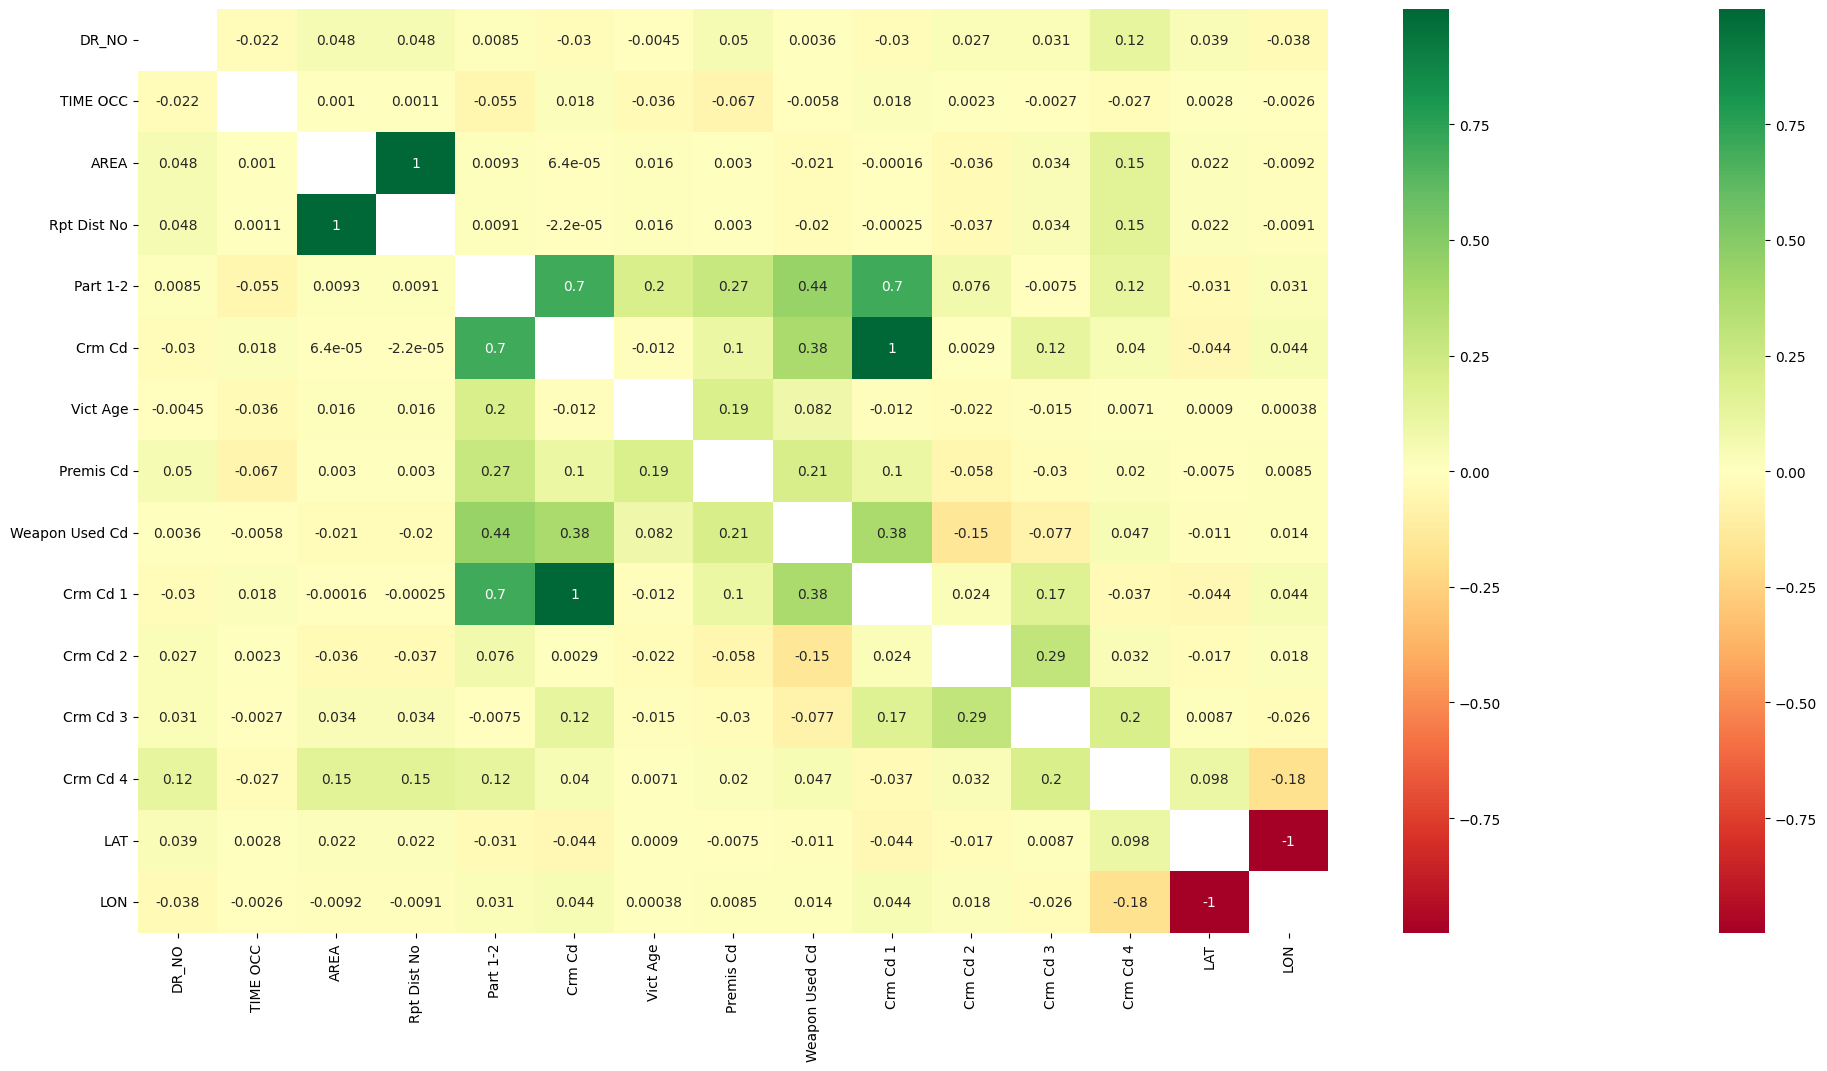

Không có cột nào có giá trị trùng lặp.


In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Tính toán ma trận tương quan
corr_matrix = df_numeric.corr()

# Tạo ma trận mặt nạ cho tam giác dưới
mask_lower = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Tạo ma trận mặt nạ cho tam giác trên
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Vẽ ma trận tương quan bằng sns.heatmap
plt.figure(figsize=(24, 12))

# Vẽ tam giác dưới của heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', mask=mask_lower)

# Vẽ tam giác trên của heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', mask=mask_upper)

plt.show()

def find_duplicate_columns(df):
    duplicate_cols = []  # Danh sách để lưu tên các cột có giá trị trùng lặp

    # Duyệt qua tất cả các cột và so sánh từng cột với các cột còn lại
    for i, col in enumerate(df.columns):
        for other_col in df.columns[i + 1:]:  # Bắt đầu từ cột tiếp theo để tránh so sánh hai lần
            if df[col].equals(df[other_col]):  # So sánh giá trị của hai cột
                duplicate_cols.append((col, other_col))  # Thêm cặp cột trùng lặp vào danh sách

    if duplicate_cols:
        print("Các cột có giá trị trùng lặp:")
        for col_pair in duplicate_cols:
            print(col_pair[0], "và", col_pair[1])
    else:
        print("Không có cột nào có giá trị trùng lặp.")

# Gọi hàm để tìm cột có giá trị trùng lặp trong DataFrame
find_duplicate_columns(df)


**Xử lí dữ liệu**


In [10]:
# # Xóa các dòng bị thiếu dữ liệu
# df_cleaned = df.dropna()

# # Kiểm tra lại tỷ lệ phần trăm các giá trị bị thiếu sau khi xóa các dòng bị thiếu
# feature_missing_values(df_cleaned)

# # Kiểm tra xem có còn dòng nào bị thiếu dữ liệu hay không
# missing_after_cleaning = df_cleaned.isnull().sum().sum()
# if missing_after_cleaning == 0:
#     print("Không còn dòng nào bị thiếu dữ liệu.")
# else:
#     print(f"Vẫn còn {missing_after_cleaning} giá trị bị thiếu trong DataFrame.")

**Xóa các cột không cần thiết** 

In [11]:
df = df.drop(['DR_NO','TIME OCC','Date Rptd','DATE OCC','AREA', 'AREA NAME','Rpt Dist No','Part 1-2','Cross Street',
              'Crm Cd','Premis Cd','Status','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Mocodes', 'Weapon Used Cd','LAT', 'LON'],axis = 1)
df
              

,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST
...,...,...,...,...,...,...,...,...
752906,"BUNCO, GRAND THEFT",25,M,W,OTHER PREMISE,NaN,Invest Cont,5300 DENNY AV
752907,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,Invest Cont,12500 BRANFORD ST
752908,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
752909,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


**Xóa các dòng dữ liệu không xác định trong giới tính**

In [12]:
# Kiểm tra xem cột 'Vict Sex' có tồn tại không
if 'Vict Sex' in df.columns:
    # Lọc bỏ các hàng có giá trị 'X' trong cột 'Vict Sex'
    df = df[df['Vict Sex'] != 'X']
else:
    print("'Vict Sex' không tồn tại trong DataFrame")
df

,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
3,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL
5,"RAPE, FORCIBLE",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
6,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,H,DEPARTMENT STORE,NaN,Invest Cont,700 S FIGUEROA ST
...,...,...,...,...,...,...,...,...
752906,"BUNCO, GRAND THEFT",25,M,W,OTHER PREMISE,NaN,Invest Cont,5300 DENNY AV
752907,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,Invest Cont,12500 BRANFORD ST
752908,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
752909,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688548 entries, 0 to 752910
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Crm Cd Desc   688548 non-null  object
 1   Vict Age      688548 non-null  int64 
 2   Vict Sex      590318 non-null  object
 3   Vict Descent  590314 non-null  object
 4   Premis Desc   688294 non-null  object
 5   Weapon Desc   246524 non-null  object
 6   Status Desc   688548 non-null  object
 7   LOCATION      688548 non-null  object
dtypes: int64(1), object(7)
memory usage: 47.3+ MB


In [14]:
#Xử lí dữ liệu bị thiếu
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Weapon Desc,442024,64.2
Vict Descent,98234,14.3
Vict Sex,98230,14.3
Premis Desc,254,0.0
Crm Cd Desc,0,0.0


**Xóa các dòng dữ liệu bị thiếu**

In [15]:
test=df.dropna()
test

,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
5,"RAPE, FORCIBLE",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
10,BURGLARY FROM VEHICLE,29,M,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH
11,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,O,PARKING LOT,VERBAL THREAT,Invest Cont,800 N ALAMEDA ST
...,...,...,...,...,...,...,...,...
752893,BATTERY - SIMPLE ASSAULT,45,F,B,PARKING LOT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
752897,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3000 BUDAU AV
752900,INTIMATE PARTNER - SIMPLE ASSAULT,27,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,11400 PORTER RANCH DR
752908,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST


**Chuyển giá trị của cột Vict Sex M, F về giá trị 0 và 1 để phù hợp với đầu vào của thuật toán**

In [16]:
Sex_temp ={"M":0,"F":1}

for dataset in [test]:
    dataset['Vict Sex']=dataset['Vict Sex'].map(Sex_temp)

C:\Users\light\AppData\Local\Temp\ipykernel_4916\2525520135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vict Sex']=dataset['Vict Sex'].map(Sex_temp)


In [17]:
test

,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,BATTERY - SIMPLE ASSAULT,36,1.0,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,BATTERY - SIMPLE ASSAULT,25,0.0,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
5,"RAPE, FORCIBLE",25,1.0,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
10,BURGLARY FROM VEHICLE,29,0.0,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH
11,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,0.0,O,PARKING LOT,VERBAL THREAT,Invest Cont,800 N ALAMEDA ST
...,...,...,...,...,...,...,...,...
752893,BATTERY - SIMPLE ASSAULT,45,1.0,B,PARKING LOT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
752897,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,1.0,H,OTHER RESIDENCE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3000 BUDAU AV
752900,INTIMATE PARTNER - SIMPLE ASSAULT,27,1.0,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,11400 PORTER RANCH DR
752908,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,1.0,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST


**Rời rạc hóa dữ liệu**

Dữ liệu Vict Age có nhiều giá trị làm cho dữ liệu bị nhiễu ta thay thế dữ liệu bằng phương pháp làm mịn binning 

#Chia cột Vict Age thành 4 giỏ

In [18]:
testmap = pd.qcut(df['Vict Age'], q=4)

df['quantile_ex_1'] = pd.qcut(df['Vict Age'], q=4) # Chia cột Vict Age thành 4 giỏ

df['quantile_ex_1'].value_counts()

C:\Users\light\AppData\Local\Temp\ipykernel_4916\1012336513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantile_ex_1'] = pd.qcut(df['Vict Age'], q=4) # Chia cột Vict Age thành 4 giỏ


quantile_ex_1
(21.0, 33.0]      180373
(-2.001, 21.0]    175436
(33.0, 47.0]      167876
(47.0, 120.0]     164863
Name: count, dtype: int64

Bé hơn hoặc bằng 21 : Kí hiệu là 1 

(21;33] : Kí hiệu là 2 

(33;47] : Kí hiệu là 3 

Lớn hơn 47 : Kí hiệu là 4 

In [19]:

for dataset1 in [test]:
    dataset1['Vict Age'] = dataset1['Vict Age'].astype(int)
    dataset1.loc[dataset1['Vict Age'] <= 21, 'Vict Age'] = 1
    dataset1.loc[(dataset1['Vict Age'] > 21) & (dataset1['Vict Age'] <= 33), 'Vict Age'] = 2
    dataset1.loc[(dataset1['Vict Age'] > 33) & (dataset1['Vict Age'] <= 47), 'Vict Age'] = 3
    dataset1.loc[dataset1['Vict Age'] > 47, 'Vict Age'] = 4

C:\Users\light\AppData\Local\Temp\ipykernel_4916\157121460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Vict Age'] = dataset1['Vict Age'].astype(int)


In [20]:
test

,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,BATTERY - SIMPLE ASSAULT,3,1.0,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,BATTERY - SIMPLE ASSAULT,2,0.0,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
5,"RAPE, FORCIBLE",2,1.0,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
10,BURGLARY FROM VEHICLE,2,0.0,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH
11,CRIMINAL THREATS - NO WEAPON DISPLAYED,3,0.0,O,PARKING LOT,VERBAL THREAT,Invest Cont,800 N ALAMEDA ST
...,...,...,...,...,...,...,...,...
752893,BATTERY - SIMPLE ASSAULT,3,1.0,B,PARKING LOT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
752897,INTIMATE PARTNER - AGGRAVATED ASSAULT,3,1.0,H,OTHER RESIDENCE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3000 BUDAU AV
752900,INTIMATE PARTNER - SIMPLE ASSAULT,2,1.0,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,11400 PORTER RANCH DR
752908,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2,1.0,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST


**Lưu lại file data đã xử lý**

In [21]:
test.to_csv('data_daxuly_2.csv')

**Ứng dụng Thuật toán**

In [22]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
import time
from scipy import sparse

In [23]:
df2 = pd.read_csv('data_daxuly_2.csv')
df2

,Unnamed: 0,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,0,BATTERY - SIMPLE ASSAULT,3,1.0,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,1,BATTERY - SIMPLE ASSAULT,2,0.0,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,5,"RAPE, FORCIBLE",2,1.0,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
3,10,BURGLARY FROM VEHICLE,2,0.0,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH
4,11,CRIMINAL THREATS - NO WEAPON DISPLAYED,3,0.0,O,PARKING LOT,VERBAL THREAT,Invest Cont,800 N ALAMEDA ST
...,...,...,...,...,...,...,...,...,...
246291,752893,BATTERY - SIMPLE ASSAULT,3,1.0,B,PARKING LOT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
246292,752897,INTIMATE PARTNER - AGGRAVATED ASSAULT,3,1.0,H,OTHER RESIDENCE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3000 BUDAU AV
246293,752900,INTIMATE PARTNER - SIMPLE ASSAULT,2,1.0,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,11400 PORTER RANCH DR
246294,752908,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2,1.0,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST


**Xóa thuộc tính Unnamed và xem lại dữ liệu**

In [24]:

df2 = df2.drop(['Unnamed: 0'], axis=1)
df2 = df2.dropna()
df2

,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,BATTERY - SIMPLE ASSAULT,3,1.0,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,BATTERY - SIMPLE ASSAULT,2,0.0,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,"RAPE, FORCIBLE",2,1.0,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
3,BURGLARY FROM VEHICLE,2,0.0,A,STREET,ROCK/THROWN OBJECT,Invest Cont,15TH
4,CRIMINAL THREATS - NO WEAPON DISPLAYED,3,0.0,O,PARKING LOT,VERBAL THREAT,Invest Cont,800 N ALAMEDA ST
...,...,...,...,...,...,...,...,...
246291,BATTERY - SIMPLE ASSAULT,3,1.0,B,PARKING LOT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
246292,INTIMATE PARTNER - AGGRAVATED ASSAULT,3,1.0,H,OTHER RESIDENCE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3000 BUDAU AV
246293,INTIMATE PARTNER - SIMPLE ASSAULT,2,1.0,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,11400 PORTER RANCH DR
246294,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2,1.0,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST


Tách dữ liệu thành 2 phần: Dữ liệu bình thường (feature) và dữ liệu chứa 
thuộc tính quyết định.

In [25]:
# Tách các cột chứa thuộc tính quyết định (label)
columns_to_drop = ['Vict Sex']

feature = df2.drop(columns=columns_to_drop, axis=1)
label = df2[['Vict Sex']]

Chuyển đổi dữ liệu số thành dữ liệu đối tượng

In [26]:
# Chuyển đổi cột 'Vict Age' sang kiểu object
feature['Vict Age'] = feature['Vict Age'].astype(object)

In [27]:
# Mã hóa nhãn (label)
label_encoder = LabelEncoder()
label['Vict Sex'] = label_encoder.fit_transform(label['Vict Sex'])

C:\Users\light\AppData\Local\Temp\ipykernel_4916\2613614205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['Vict Sex'] = label_encoder.fit_transform(label['Vict Sex'])


Chuyển đổi dữ liệu không phải số về dạng số bằng One-hot Vector 

In [28]:

# Xác định các cột phân loại và số lượng giá trị duy nhất trong mỗi cột
categorical_cols = feature.select_dtypes(include=['object', 'category']).columns
numerical_cols = feature.select_dtypes(include=['int64', 'float64']).columns

In [29]:
# Áp dụng OneHotEncoder cho các cột phân loại có ít giá trị duy nhất
few_unique_cols = [col for col in categorical_cols if feature[col].nunique() < 10]
many_unique_cols = [col for col in categorical_cols if feature[col].nunique() >= 10]
for col in many_unique_cols:
    le = LabelEncoder()
    feature[col] = le.fit_transform(feature[col])
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), few_unique_cols)
    ],
    remainder='passthrough'
)

In [30]:

# Fit và transform dữ liệu
feature_encoded = preprocessor.fit_transform(feature)

In [31]:
# Chuyển đổi numpy.ndarray thành DataFrame
feature_encoded_df = pd.DataFrame(feature_encoded, columns=preprocessor.get_feature_names_out())

In [32]:
# # Xuất DataFrame thành file CSV
# feature_encoded_df.to_csv('dubao.csv', index=False)

In [33]:

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(feature_encoded, label, test_size=0.3, random_state=42)

# Thuật toán ID3

In [34]:
start_ID3 = time.time()
clf1 = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf1.fit(X_train, y_train.values.ravel())
end_ID3 = time.time()
thoigian1 = timedelta(seconds=round(end_ID3 - start_ID3, 4))
print("Thời gian chạy thuật toán:", thoigian1)

Thời gian chạy thuật toán: 0:00:01.147900


In [35]:
clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf1.fit(X_train,y_train)
tree_pred1 = clf1.predict(X_test)


In [36]:

tree_score1 = metrics.accuracy_score(y_test,tree_pred1)
print("Độ chính xác:",tree_score1)
print("Report:",metrics.classification_report(y_test,tree_pred1))


Độ chính xác: 0.6100403345875857
Report:               precision    recall  f1-score   support

           0       0.62      0.63      0.62     38272
           1       0.60      0.59      0.59     35610

    accuracy                           0.61     73882
   macro avg       0.61      0.61      0.61     73882
weighted avg       0.61      0.61      0.61     73882



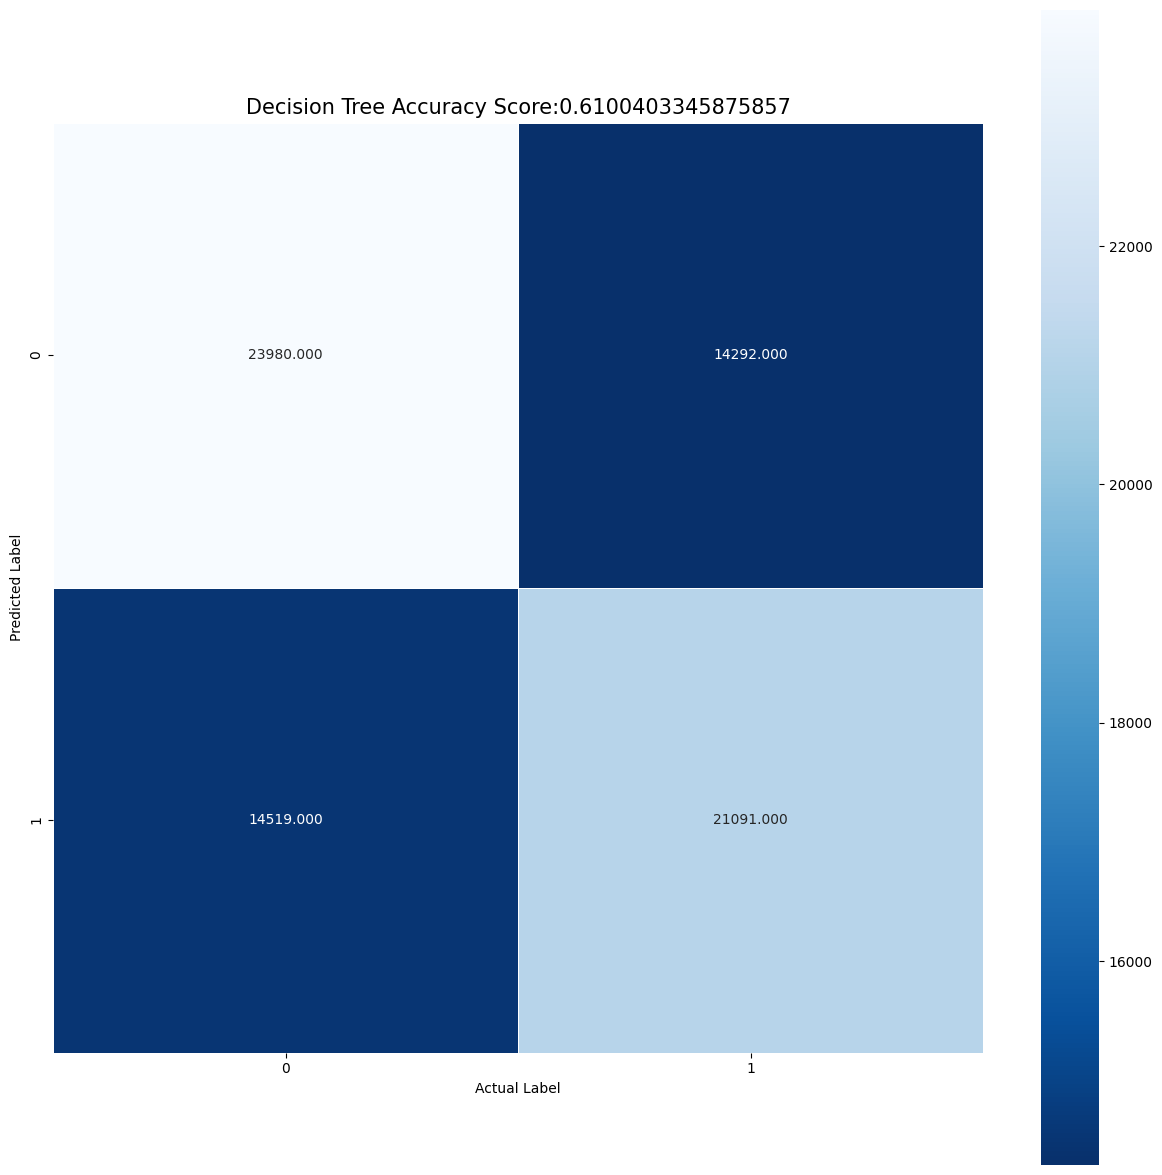

In [37]:
#Tính toán ma trận nhầm lẫn
tree_cm1 = metrics.confusion_matrix(y_test,tree_pred1)

#Vẽ đồ thị ma trận nhầm lẫn
plt.figure(figsize=(15,15))
sns.heatmap(tree_cm1,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score1)
plt.title(title,size=15);

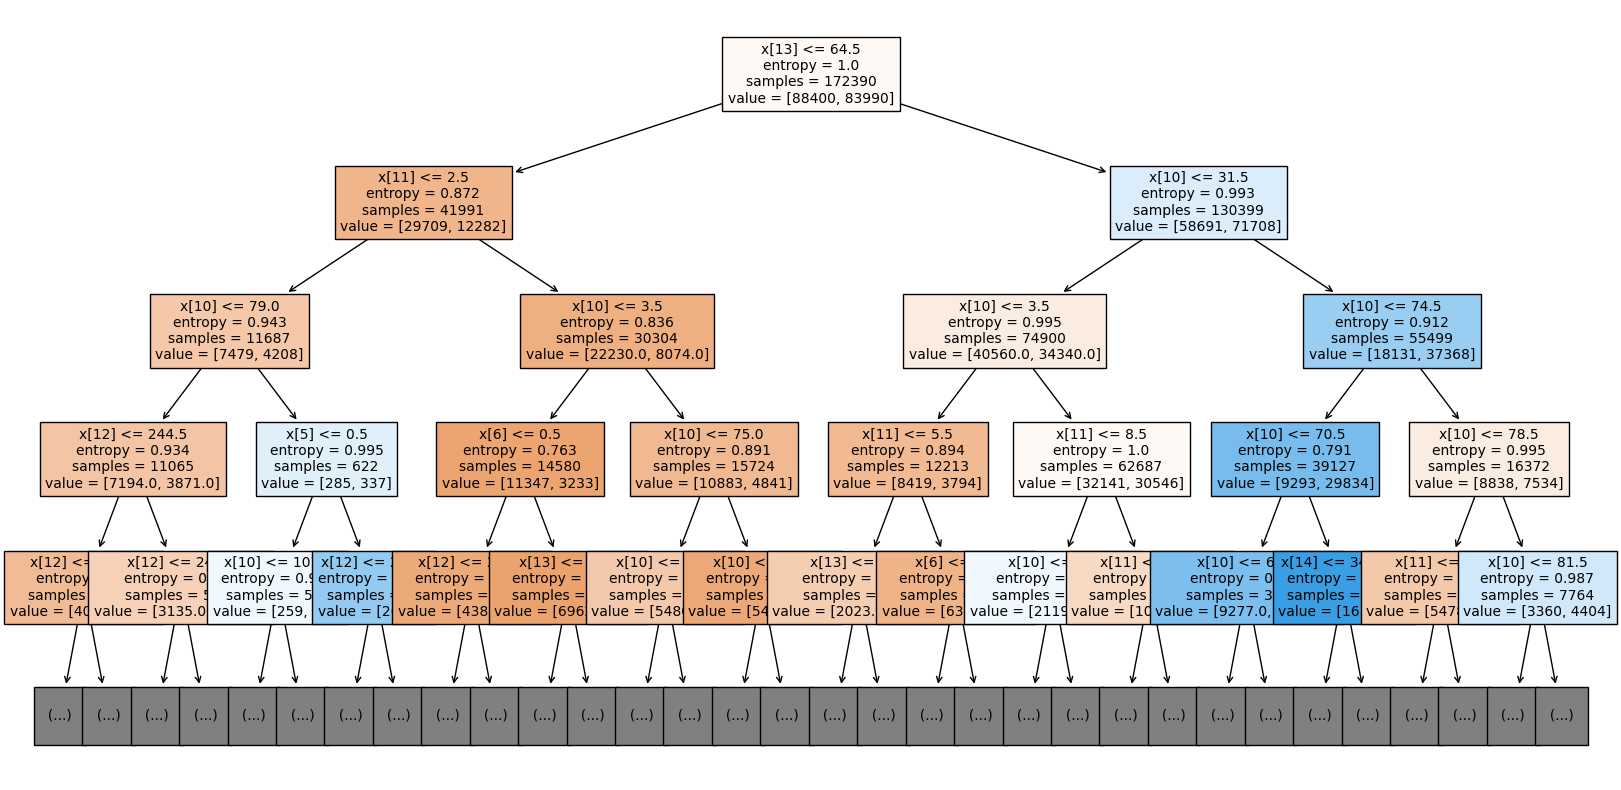

In [38]:

fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf1, filled=True, fontsize=10, max_depth=4)  # max_depth để giới hạn độ sâu
plt.savefig('decision_tree', dpi=100)
plt.show()


#### thuật toán CART



In [39]:

start_CART = time.time()
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(X_train,y_train)
end_CART= time.time()
thoigian2 = timedelta(seconds=round(end_CART-start_CART,4))
print(thoigian2)

0:00:00.801300


In [40]:
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
tree_pred2 = clf2.predict(X_test)

tree_score2 = metrics.accuracy_score(y_test,tree_pred2)
print("Độ chính xác:",tree_score2)
print("Report:",metrics.classification_report(y_test,tree_pred2))

Độ chính xác: 0.6107306245093528
Report:               precision    recall  f1-score   support

           0       0.62      0.63      0.63     38272
           1       0.60      0.59      0.60     35610

    accuracy                           0.61     73882
   macro avg       0.61      0.61      0.61     73882
weighted avg       0.61      0.61      0.61     73882



In [42]:
#Tính toán ma trận nhầm lẫn
tree_cm2 = metrics.confusion_matrix(y_test,tree_pred1)

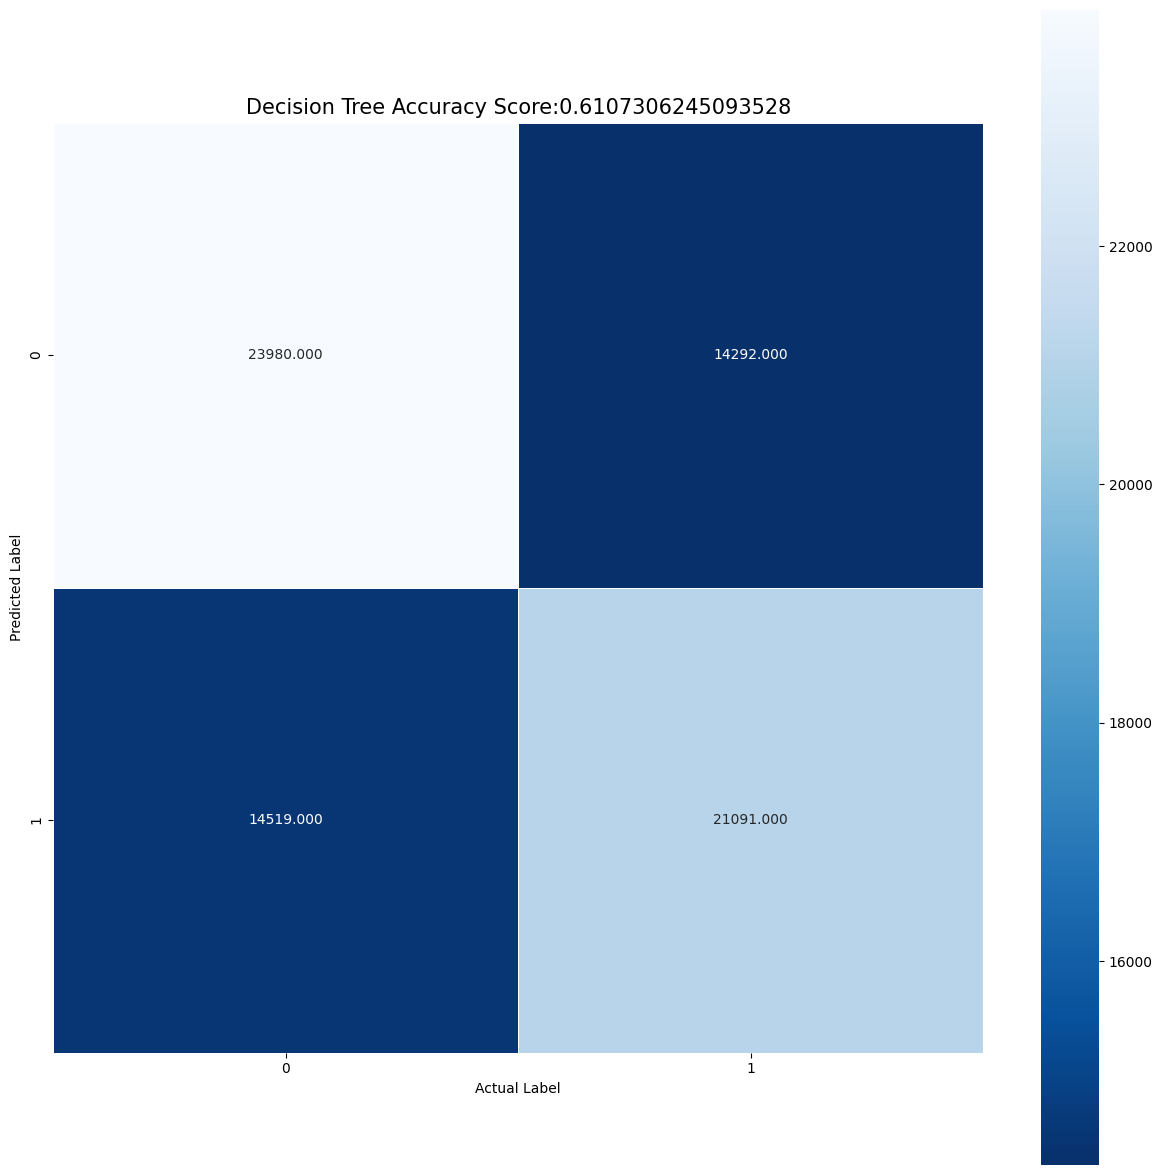

In [43]:
#Vẽ đồ thị ma trận nhầm lẫn
plt.figure(figsize=(15,15))
sns.heatmap(tree_cm2,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score2)
plt.title(title,size=15);

#### thuật toán Naive Bayes


In [44]:
start_Bayes = time.time()
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)
end_Bayes= time.time()
thoigian3 = timedelta(seconds=round(end_Bayes-start_Bayes,4))
print(thoigian3)

0:00:00.110900


C:\Users\light\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Độ chính xác:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Độ chính xác: 0.6142497496007147
Report:               precision    recall  f1-score   support

           0       0.65      0.55      0.60     38272
           1       0.59      0.68      0.63     35610

    accuracy                           0.61     73882
   macro avg       0.62      0.62      0.61     73882
weighted avg       0.62      0.61      0.61     73882



Thuật toán Random Forest


In [46]:
start_RM = time.time()
rfModel = RandomForestClassifier(random_state=0, n_estimators=1)
rfModel.fit(X_train, y_train.values.ravel())
end_RM = time.time()
thoigianRM = timedelta(seconds=round(end_RM - start_RM, 4))
print("Thoi gian chay RM: ", thoigianRM)

Thoi gian chay RM:  0:00:00.216400


In [47]:
rm_pred = rfModel.predict(X_test)

rm_score = metrics.accuracy_score(y_test, rm_pred)
print("Độ chính xác:", rm_score)
print("Report:",metrics.classification_report(y_test,rm_pred))

Độ chính xác: 0.5992663977694161
Report:               precision    recall  f1-score   support

           0       0.61      0.61      0.61     38272
           1       0.58      0.59      0.58     35610

    accuracy                           0.60     73882
   macro avg       0.60      0.60      0.60     73882
weighted avg       0.60      0.60      0.60     73882



###  ĐÁNH GIÁ THUẬT TOÁN

In [48]:
# #Đo thời gian của 3 thuật toán
# ax = sns.distplot(end_ID3-start_ID3, bins=10, label = 'Thuật toán ID3', kde = False)
# ax = sns.distplot(end_CART-start_CART, bins=10, label = 'Thuật toán CART', kde = False)
# ax = sns.distplot(end_Bayes-start_Bayes, bins=10, label = 'Thuật toán Naive Bayes', kde = False)
# ax.legend()
# ax.set_title('Thời gian chạy của 3 thuật toán')

In [49]:
# #Đo độ chính xác của 3 thuật toán
# ax = sns.distplot(tree_score1, bins=10, label = 'Thuật toán ID3', kde = False)
# ax = sns.distplot(tree_score2, bins=10, label = 'Thuật toán CART', kde = False)
# ax = sns.distplot(bayes_score, bins=10, label = 'Thuật toán Naive Bayes', kde = False)
# ax.legend()
# ax.set_title('Độ chính xác của 3 thuật toán')

C:\Users\light\AppData\Local\Temp\ipykernel_4916\2156809455.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thuật toán', y='Độ chính xác', data=accuracy_data, palette='pastel')


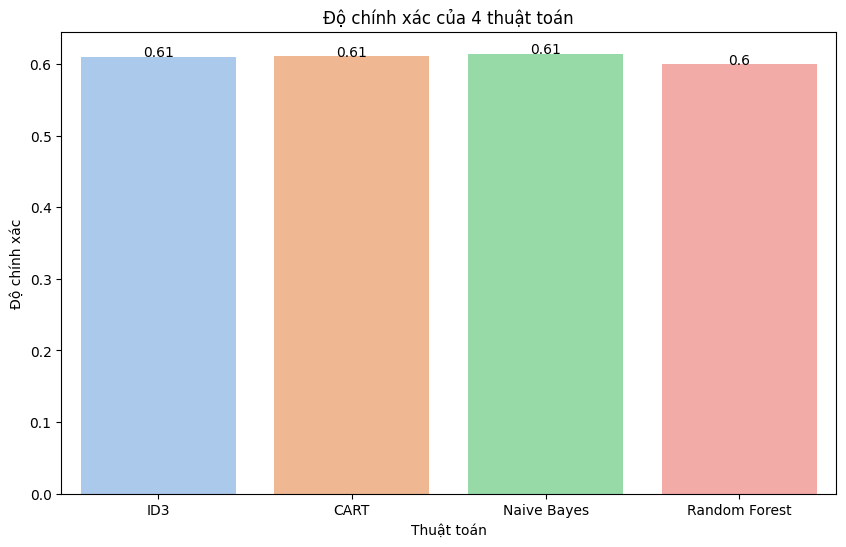

C:\Users\light\AppData\Local\Temp\ipykernel_4916\2156809455.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thuật toán', y='Thời gian chạy (giây)', data=time_data, palette='pastel')


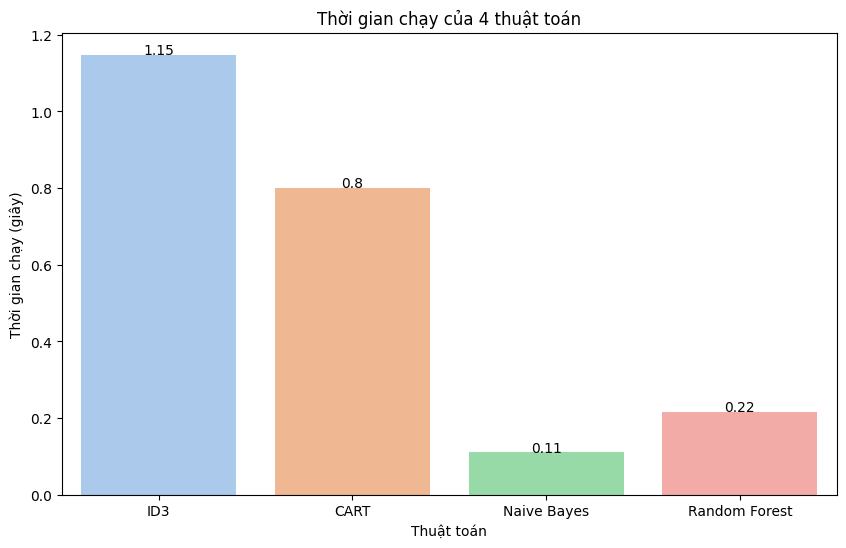

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đo độ chính xác của 4 thuật toán
accuracy_data = pd.DataFrame({
    'Thuật toán': ['ID3', 'CART', 'Naive Bayes', 'Random Forest'],
    'Độ chính xác': [tree_score1, tree_score2, bayes_score, rm_score]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Thuật toán', y='Độ chính xác', data=accuracy_data, palette='pastel')
plt.title('Độ chính xác của 4 thuật toán')
plt.ylabel('Độ chính xác')
plt.xlabel('Thuật toán')

# In số liệu trên biểu đồ
for index, row in accuracy_data.iterrows():
    plt.text(index, row['Độ chính xác'], round(row['Độ chính xác'], 2), color='black', ha="center")

plt.show()

# Đo thời gian của 4 thuật toán
time_data = pd.DataFrame({
    'Thuật toán': ['ID3', 'CART', 'Naive Bayes', 'Random Forest'],
    'Thời gian chạy (giây)': [end_ID3 - start_ID3, end_CART - start_CART, end_Bayes - start_Bayes, end_RM - start_RM]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Thuật toán', y='Thời gian chạy (giây)', data=time_data, palette='pastel')
plt.title('Thời gian chạy của 4 thuật toán')
plt.ylabel('Thời gian chạy (giây)')
plt.xlabel('Thuật toán')

# In số liệu trên biểu đồ
for index, row in time_data.iterrows():
    plt.text(index, row['Thời gian chạy (giây)'], round(row['Thời gian chạy (giây)'], 2), color='black', ha="center")

plt.show()


#DỰ BÁO

In [51]:
# Xuất DataFrame thành file CSV
feature_encoded_df.to_csv('dubao.csv', index=False)

In [52]:
testdubao = pd.read_csv('dubao.csv')
testdubao.columns

Index(['cat__Vict Age_1', 'cat__Vict Age_2', 'cat__Vict Age_3',
       'cat__Vict Age_4', 'cat__Status Desc_Adult Arrest',
       'cat__Status Desc_Adult Other', 'cat__Status Desc_Invest Cont',
       'cat__Status Desc_Juv Arrest', 'cat__Status Desc_Juv Other',
       'cat__Status Desc_UNK', 'remainder__Crm Cd Desc',
       'remainder__Vict Descent', 'remainder__Premis Desc',
       'remainder__Weapon Desc', 'remainder__LOCATION'],
      dtype='object')

In [53]:
# Đọc lại dữ liệu từ file CSV
testdubao = pd.read_csv('dubao.csv')

# Dự đoán với mô hình đã huấn luyện
relation_pred = gnb.predict(testdubao)

# Chuyển đổi kết quả dự đoán về nhãn gốc
relation_pred_labels = label_encoder.inverse_transform(relation_pred)
print("Kết quả dự đoán:", relation_pred_labels)

# Thêm nhóm độ tuổi vào kết quả dự đoán
testdubao['Vict Sex Prediction'] = relation_pred_labels
testdubao['AgeGroup'] = testdubao[['cat__Vict Age_1', 'cat__Vict Age_2', 'cat__Vict Age_3', 'cat__Vict Age_4']].idxmax(axis=1)

# Reorder các cột để đảm bảo 'AgeGroup' và 'Vict Sex Prediction' nằm sau các cột 'cat__Vict Age_x'
columns_order = ['cat__Vict Age_1', 'cat__Vict Age_2', 'cat__Vict Age_3', 'cat__Vict Age_4', 'AgeGroup', 'Vict Sex Prediction']
testdubao = testdubao.reindex(columns=columns_order)

# In ra kết quả
print(testdubao)


Kết quả dự đoán: [1. 1. 1. ... 1. 1. 0.]
        cat__Vict Age_1  cat__Vict Age_2  cat__Vict Age_3  cat__Vict Age_4  \
0                   0.0              0.0              1.0              0.0   
1                   0.0              1.0              0.0              0.0   
2                   0.0              1.0              0.0              0.0   
3                   0.0              1.0              0.0              0.0   
4                   0.0              0.0              1.0              0.0   
...                 ...              ...              ...              ...   
246267              0.0              0.0              1.0              0.0   
246268              0.0              0.0              1.0              0.0   
246269              0.0              1.0              0.0              0.0   
246270              0.0              1.0              0.0              0.0   
246271              0.0              1.0              0.0              0.0   

               AgeGrou

C:\Users\light\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
